In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import glob
from cdo import *
cdo = Cdo()
import os

In [2]:
%matplotlib inline

In [4]:
fName='/glade/scratch/currierw/ACCESS1-0/historical/tos_day_ACCESS1-0_historical_r1i1p1_19500101-19591231.nc'
tos_orig=xr.open_dataset(fName)
tos_orig.coords

Coordinates:
  * time     (time) datetime64[ns] 1950-01-01T12:00:00 ... 1959-12-31T12:00:00
  * j        (j) int32 0 1 2 3 4 5 6 7 8 ... 291 292 293 294 295 296 297 298 299
  * i        (i) int32 0 1 2 3 4 5 6 7 8 ... 351 352 353 354 355 356 357 358 359
    lat      (j, i) float32 ...
    lon      (j, i) float32 ...

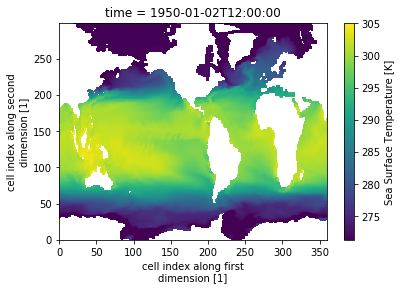

In [6]:
tos_orig['tos'][1,:,:].plot()

In [10]:
tos_orig['tos'].shape

(3652, 300, 360)

In [34]:
# Transform sea surface temperature data

# First, we need a regular grid (base) for which we want to transform the `tos` data onto. Let's choose orog
fBase='/glade/scratch/currierw/ACCESS1-0/historical/orog_fx_ACCESS1-0_historical_r0i0p0.nc'

cdo.griddes("-f "+fBase+" >grid.txt")

fNames=glob.glob('/glade/scratch/currierw/ACCESS1-0/historical/tos*1.nc')
for files in fNames:
    fTmp=os.path.splitext(files)[0]
    cdo.remapcon("grid.txt ", input=files, output=fTmp+"_regrd.nc", options="-f nc")

In [11]:
fNameTos  = '/glade/scratch/currierw/ACCESS1-0/historical/tos_day_ACCESS1-0_historical_r1i1p1_19500101-19591231_regrd.nc'
# open the datasets (ds) with xarray
tos  = xr.open_dataset(fNameTos)
tos.coords

Coordinates:
  * time     (time) datetime64[ns] 1950-01-01T12:00:00 ... 1959-12-31T12:00:00
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0

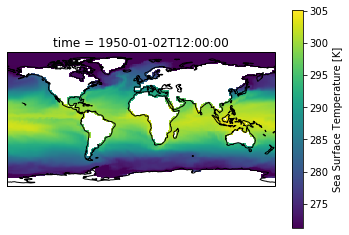

In [12]:
ax = plt.axes(projection=ccrs.PlateCarree())
p = tos['tos'][1,:,:].plot(x='lon', y='lat',transform=ccrs.PlateCarree(),subplot_kws={'projection': ccrs.PlateCarree()})
ax.coastlines();

In [13]:
tos['tos'].shape

(3652, 145, 192)